# FIRST DATA ANALYSIS

## DATA IMPORT

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### ASRS report data

In [2]:
# Data Csv file import 
df=pd.read_csv('ASRS_20y_data.csv',index_col=0)


C:\Users\hassir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,13,16,20,30,39,40,41,42,43,44,45,46,47,48,49,50,51,68,70,71,72,73,74,79,80,82,83,84,87,90,92,99,100,103,108,109,110,111,115,117,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### State Reference data

In [3]:
# Dictionnary for State Reference 
# Csv file import 
Stat_Reference_df=pd.read_csv('State_Reference_Dictionnary.csv',sep=';')
Stat_Reference_df.head()

,State Reference,State Type,State Name
0,AL,US State,ALABAMA
1,AK,US State,ALASKA
2,AS,US Territory,AMERICAN SAMOA
3,AZ,US State,ARIZONA
4,AR,US State,ARKANSAS


### Data dictionnary - data theme

In [4]:
Data_Columns_Theme_df=pd.read_csv('Data Dictionnary themes.csv',sep=';')
Data_Columns_Theme_df.head()
Data_Columns_Theme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Theme     125 non-null    object
 1   variable  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


# DATA DISCOVERY

In [5]:
# Sanity check : 
# Validation of unicity and completion of ACN (report ID) : 
# as data originates from repeted extractions of ASRS database, this ensures that no report was imported twice

print(df['ACN'].duplicated().sum(),' doublon pour la variable ACN') 
print(df['ACN'].isnull().sum(axis = 0) , 'valeurs NaN pour la variable ACN')
print ('Validation 0 doublon / 0 Nan pour la variable ACN => identifiant')

0  doublon pour la variable ACN
0 valeurs NaN pour la variable ACN
Validation 0 doublon / 0 Nan pour la variable ACN => identifiant


In [6]:
df[df['ACN']==1874638]

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
3744,1874638,202201,0601-1200,SAT.Airport,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON SAT,Air Carrier,Commercial Fixed Wing,NaN,2.0,Part 121,IFR,Passenger,FMS Or FMC; GPS; Localizer/Glideslope/ILS 22,Initial Approach,Visual Approach; STAR MARCS 1,Class C SAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aircraft X,Flight Deck,Air Carrier,Pilot Flying,Flight Crew Instrument; Flight Crew Air Transp...,NaN,NaN,Situational Awareness; Confusion; Distraction;...,NaN,NaN,1874638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inflight Event / Encounter CFTT / CFIT,NaN,NaN,Automation Aircraft Terrain Warning; Person Fl...,In-flight,General None Reported / Taken,Chart Or Publication; Company Policy; Environm...,Ambiguous,The ATIS at SAT was advertising the visual app...,NaN,NaN,NaN,Air Carrier Pilot reported while on the MARCS ...,NaN


In [7]:
max(df['Date'])

202201

In [8]:
df.head(3)

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
0,986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,NaN,986560.0,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8;000 FT proceeding direct...,NaN,A11 Controller described a descent below MVA; ...,NaN
1,988077,201201,0001-0600,ENA.Airp

In [9]:
df.shape
# (108407, 126)

(108407, 126)

In [10]:
df.info()  
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 108407 entries, 0 to 4552
# Columns: 126 entries, ACN to Unnamed: 125
# dtypes: float64(23), int64(2), object(101)
# memory usage: 105.0+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108407 entries, 0 to 4552
Columns: 126 entries, ACN to Unnamed: 125
dtypes: float64(23), int64(2), object(101)
memory usage: 105.0+ MB


## DATA AUDIT

### Missing values

In [11]:
# Discrepancies in the data completion 
# => which variables to keep in the analysis ?
df.isnull().sum(axis = 0) 

ACN                                                                   0
Date                                                                  0
Local Time Of Day                                                  8579
Locale Reference                                                    815
State Reference                                                       0
Relative Position.Angle.Radial                                   102323
Relative Position.Distance.Nautical Miles                         81814
Altitude.AGL.Single Value                                         63700
Altitude.MSL.Single Value                                         58514
Latitude / Longitude (UAS)                                       108407
Flight Conditions                                                 39075
Weather Elements / Visibility                                     77243
Work Environment Factor                                          107772
Light                                                           

### Data types (raw)

In [12]:
df.dtypes

ACN                                                                int64
Date                                                               int64
Local Time Of Day                                                 object
Locale Reference                                                  object
State Reference                                                   object
Relative Position.Angle.Radial                                   float64
Relative Position.Distance.Nautical Miles                        float64
Altitude.AGL.Single Value                                         object
Altitude.MSL.Single Value                                        float64
Latitude / Longitude (UAS)                                       float64
Flight Conditions                                                 object
Weather Elements / Visibility                                     object
Work Environment Factor                                           object
Light                                              

### Quantitative data analysis

In [13]:
# Création du DF df_NotNull  = df sans les colonnes vides. 
df_NotNull = df.dropna(axis = 1, how = 'all')  # Supprime les colonnes vides 
df_NotNull.info()  
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 108407 entries, 0 to 4552
# Columns: 115 entries, ACN to Synopsis
# dtypes: float64(12), int64(2), object(101)
# memory usage: 95.9+ MB

# => 126 - 115 = 11 columns empty

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108407 entries, 0 to 4552
Columns: 115 entries, ACN to Synopsis
dtypes: float64(12), int64(2), object(101)
memory usage: 95.9+ MB


In [14]:
# "Quantitative" data description (including ACN, ASRS Number and ASRS Number.1 = IDs)
# Excludes empty columns
df_NotNull.describe().T

# => Date et Crew Size , bonnes candidates pour une analyse quanti / dataviz car assez complètes

,count,mean,std,min,25%,50%,75%,max
ACN,108407.0,1.043728e+06,4.008247e+05,506790.0,698473.00,936006.0,1375552.00,1.874638e+06
Date,108407.0,2.010913e+05,1.344898e+03,2005.0,200605.00,201102.0,201607.00,2.022010e+05
Relative Position.Angle.Radial,6084.0,1.836988e+02,1.061591e+02,0.0,90.00,180.0,270.00,3.605555e+02
Relative Position.Distance.Nautical Miles,26593.0,1.471161e+01,6.001108e+01,0.0,0.00,3.0,13.00,5.000000e+03
Altitude.MSL.Single Value,49893.0,1.273897e+04,1.279581e+04,0.0,3000.00,7000.0,21000.00,3.400000e+05
Crew Size,98916.0,1.831291e+00,4.875707e-01,0.0,2.00,2.0,2.00,1.000000e+01
Number Of Seats.Number,554.0,1.579531e+02,5.729188e+01,0.0,129.00,150.0,188.00,4.360000e+02
Passengers On Board.Number,472.0,1.210530e+02,6.912977e+01,0.0,71.50,129.0,172.50,3.500000e+02
Crew Size Flight Attendant.Number Of Crew,149.0,5.006711e+00,3.392154e+00,1.0,3.00,4.0,6.00,2.000000e+01
Crew Size.1,14467.0,1.632750e+00,5.372739e-01,0.0,1.00,2.0,2.00,1.000000e+01


In [15]:
# CSV export of "Quantitative" data description (Excluding empty columns) 
df_describe=pd.DataFrame(df.describe().T)
df_describe.to_csv('ASRS_20y_data_describe.csv', index = True)

### Qualitative data analysis

In [16]:
# CLassification of variables according to their role
df_cat_data=df_NotNull.select_dtypes(include='O').drop(['Narrative','Narrative.1','Callback','Callback.1','Synopsis'], axis = 1)  # ou cat_data=df.select_dtypes(include='object')
df_cat_data.shape
#(108407, 96)

(108407, 96)

In [17]:
nb_null=0
nb_entries=len(df_cat_data)
N=20 # Nbr of rows in the top
for col in df_cat_data.columns :
    print("\n")
    print("VARIABLE : ",col, )
    nb_null=df_cat_data[col].isnull().sum(axis = 0)
    print('VALEURS NaN : ',nb_null , '   (',round(nb_null/nb_entries*100,2),'%)    /      VALEURS NON VIDES : ',nb_entries-nb_null ,'  (',round((nb_entries-nb_null)/nb_entries*100,2),'%)')
    S=df_cat_data[col].value_counts(dropna=True, normalize=False)
    print("    Nombre de modalités (hors Nan) : ",len(S) )
    S2=df_cat_data[col].value_counts(dropna=False, normalize=False)
    S_topN=S2.head(N)
    print('TOP ',len(S_topN) ,'VALEURS',S_topN.sum(), '   (',round(S_topN.sum()/nb_entries*100,2),'%)' )
    print(S_topN)    
    
# Certaines variables sont à parser (à lister) avant le value_counts comme 'Weather Elements / Visibility' (cf cellule suivante)



VARIABLE :  Local Time Of Day
VALEURS NaN :  8579    ( 7.91 %)    /      VALEURS NON VIDES :  99828   ( 92.09 %)
    Nombre de modalités (hors Nan) :  5
TOP  6 VALEURS 108407    ( 100.0 %)
1201-1800    38475
0601-1200    28931
1801-2400    22198
0001-0600    10201
NaN           8579
ZZZ             23
Name: Local Time Of Day, dtype: int64


VARIABLE :  Locale Reference
VALEURS NaN :  815    ( 0.75 %)    /      VALEURS NON VIDES :  107592   ( 99.25 %)
    Nombre de modalités (hors Nan) :  4910
TOP  20 VALEURS 61341    ( 56.58 %)
ZZZ.Airport     38769
ZZZ.ARTCC        5272
ZZZZ.Airport     2055
ZZZ.TRACON       1902
ORD.Airport      1444
LAX.Airport      1192
TEB.Airport      1056
DFW.Airport      1023
DEN.Airport       938
SFO.Airport       929
LAS.Airport       864
ATL.Airport       840
NaN               815
ZZZ.Tower         741
ZZZZ.ARTCC        644
LGA.Airport       617
EWR.Airport       616
PHL.Airport       559
MIA.Airport       544
JFK.Airport       521
Name: Locale Reference, 

    Nombre de modalités (hors Nan) :  1887
TOP  20 VALEURS 103842    ( 95.79 %)
NaN                                         90258
FMS Or FMC                                  10710
GPS                                          1034
FMS Or FMC; GPS                               959
GPS; FMS Or FMC                               437
VOR / VORTAC ZZZ.VOR                           54
Localizer/Glideslope/ILS Runway XX             47
Localizer/Glideslope/ILS N/S                   33
Localizer/Glideslope/ILS 9R                    30
Localizer/Glideslope/ILS 23                    27
Localizer/Glideslope/ILS 27                    27
Localizer/Glideslope/ILS Runway 25L            27
Localizer/Glideslope/ILS 27L                   27
Localizer/Glideslope/ILS 35L                   26
Localizer/Glideslope/ILS 25L                   25
Localizer/Glideslope/ILS 4R                    25
Localizer/Glideslope/ILS 24R                   24
FMS Or FMC; Localizer/Glideslope/ILS 25L       24
INS                 

VALEURS NaN :  64392    ( 59.4 %)    /      VALEURS NON VIDES :  44015   ( 40.6 %)
    Nombre de modalités (hors Nan) :  584
TOP  20 VALEURS 78784    ( 72.67 %)
NaN                                         64392
FMS/FMC                                      2467
Turbine Engine                               2190
Engine                                       1331
Flap Control (Trailing & Leading Edge)        674
Gear Extend/Retract Mechanism                 671
Air Conditioning and Pressurization Pack      660
Pressurization System                         623
GPS & Other Satellite Navigation              572
Autopilot                                     566
Hydraulic Main System                         544
VHF                                           518
Nose Gear                                     502
Normal Brake System                           470
Exterior Pax/Crew Door                        462
Cockpit Window                                457
Landing Gear                           

TOP  2 VALEURS 108407    ( 100.0 %)
NaN              108404
Other unknown         3
Name: Waivers / Exemptions / Authorizations (UAS).1, dtype: int64


VARIABLE :  Weight Category (UAS).1
VALEURS NaN :  108402    ( 100.0 %)    /      VALEURS NON VIDES :  5   ( 0.0 %)
    Nombre de modalités (hors Nan) :  2
TOP  3 VALEURS 108407    ( 100.0 %)
NaN      108402
Small         3
Large         2
Name: Weight Category (UAS).1, dtype: int64


VARIABLE :  Configuration (UAS).1
VALEURS NaN :  108382    ( 99.98 %)    /      VALEURS NON VIDES :  25   ( 0.02 %)
    Nombre de modalités (hors Nan) :  2
TOP  3 VALEURS 108407    ( 100.0 %)
NaN            108382
Multi-Rotor        22
Fixed Wing          3
Name: Configuration (UAS).1, dtype: int64


VARIABLE :  Flight Operated As (UAS).1
VALEURS NaN :  108406    ( 100.0 %)    /      VALEURS NON VIDES :  1   ( 0.0 %)
    Nombre de modalités (hors Nan) :  1
TOP  2 VALEURS 108407    ( 100.0 %)
NaN      108406
BVLOS         1
Name: Flight Operated As (UAS).1,

VALEURS NaN :  94464    ( 87.14 %)    /      VALEURS NON VIDES :  13943   ( 12.86 %)
    Nombre de modalités (hors Nan) :  26
TOP  20 VALEURS 108400    ( 99.99 %)
NaN                                         94464
Flight Deck                                 13562
General Seating Area                          196
Cabin Jumpseat                                 54
Crew Rest Area                                 40
Door Area                                      34
Galley                                         20
Other Exterior                                 11
Lavatory                                        8
Other # 1 Engine                                1
Other Wheel Well                                1
Other AT Engine                                 1
Other Tug Guideman                              1
Other Tow Vehicle                               1
Other FBO                                       1
Other Dispatcher                                1
Other Exterior & Interior of A/C Load

TOP  20 VALEURS 33557    ( 30.95 %)
Aircraft Equipment Problem Critical                                                                                                                                                                  8497
Aircraft Equipment Problem Less Severe                                                                                                                                                               4093
Deviation / Discrepancy - Procedural Published Material / Policy                                                                                                                                     2283
Aircraft Equipment Problem Less Severe; Deviation / Discrepancy - Procedural Published Material / Policy                                                                                             1830
Conflict NMAC                                                                                                                                               

    Nombre de modalités (hors Nan) :  18
TOP  19 VALEURS 108407    ( 100.0 %)
Human Factors                                   45896
Aircraft                                        25964
Ambiguous                                        9078
Procedure                                        7834
Company Policy                                   5982
Weather                                          3304
Environment - Non Weather Related                2301
Chart Or Publication                             1833
Airport                                          1771
ATC Equipment / Nav Facility / Buildings         1624
Airspace Structure                               1006
NaN                                               454
Equipment / Tooling                               376
Manuals                                           303
Staffing                                          245
MEL                                               216
Incorrect / Not Installed / Unavailable Part      145
Soft

In [18]:
# Displays all the values of a particular column
df_cat_data['Locale Reference'].value_counts(dropna=True, normalize=False)

ZZZ.Airport                  38769
ZZZ.ARTCC                     5272
ZZZZ.Airport                  2055
ZZZ.TRACON                    1902
ORD.Airport                   1444
LAX.Airport                   1192
TEB.Airport                   1056
DFW.Airport                   1023
DEN.Airport                    938
SFO.Airport                    929
LAS.Airport                    864
ATL.Airport                    840
ZZZ.Tower                      741
ZZZZ.ARTCC                     644
LGA.Airport                    617
EWR.Airport                    616
PHL.Airport                    559
MIA.Airport                    544
JFK.Airport                    521
IAD.Airport                    510
CLT.Airport                    509
PHX.Airport                    508
SEA.Airport                    506
DCA.Airport                    478
SCT.TRACON                     468
BOS.Airport                    461
ZDC.ARTCC                      441
IAH.Airport                    417
ZLA.ARTCC           

In [19]:
##  Test : conversion of the column into float type 
## ValueError: could not convert string to float: 'xxx'   gives the modality preventing the conversion (see next cell)

# test= df_cat_data['RVR.Single Value'].astype('float')

In [20]:
len(df[df['RVR.Single Value']=='/'] )

10

In [21]:
# Collection of inappropriate values in columns to convert as numeric
df[df['Altitude.AGL.Single Value']=='East']   # 1 entry ACN = 735456
df[df['Ceiling']=='CLR']   # 8530 entries + entrées telles que 'CLR; 76'
df[df['RVR.Single Value']=='/']   # 10 entries

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Airspace Authorization Provider (UAS).1,Operating Under Waivers / Exemptions / Authorizations (UAS).1,Waivers / Exemptions / Authorizations (UAS).1,Airworthiness Certification (UAS).1,Weight Category (UAS).1,Configuration (UAS).1,Flight Operated As (UAS).1,Flight Operated with Visual Observer (UAS).1,Control Mode (UAS).1,Flying In / Near / Over (UAS).1,Passenger Capable (UAS).1,Type (UAS).1,Number of UAS Being Controlled (UAS).1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,UAS Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Unnamed: 125
1209,1609370,201901,1801-2400,OXC.Airport,CT,180.0,4.0,NaN,2000.0,NaN,VMC,10,NaN,Night,5000,/,CTAF OXC,Corporate,Any Unknown or Unlisted Aircraft Manufacturer,NaN,2.0,Part 91,VFR,Ferry / Re-Positioning,NaN,Final Approach,Visual Approach,Class D OXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aircraft X,Flight Deck,Corporate,Captain,Flight Crew Air Transport Pilot (ATP); Flight ...,Flight Crew Last 90 Days 20; Flight Crew Total...,NaN,Confusion,NaN,NaN,1609370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inflight Event / Encounter Other / Unknown,NaN,NaN,Person Flight Crew,In-flight,General None Reported / Taken,ATC Equipment / Nav Facility / Buildings; Huma...,Ambiguous,While approaching to land at OXC. We noticed w...,NaN,NaN,NaN,Corporate aircraft Pilot reported confusing li...,NaN
466,1072738,201303,1201-1800,MYNN.Airport,FO,NaN,NaN,

### Textual data analysis

In [22]:
# CLassification of variables according to their role
df_text_data=df_NotNull.loc[:,['Narrative','Narrative.1','Callback','Callback.1','Synopsis']]  # ou cat_data=df.select_dtypes(include='object')
df_text_data.shape
#(108407, 96)

(108407, 5)

In [23]:
nb_null=0
nb_entries=len(df_cat_data)
N=20 # Nbr of rows in the top
for col in df_text_data.columns :
    print("\n")
    print("VARIABLE : ",col, )
    nb_null=df_text_data[col].isnull().sum(axis = 0)
    print('VALEURS NaN : ',nb_null , '   (',round(nb_null/nb_entries*100,2),'%)    /      VALEURS NON VIDES : ',nb_entries-nb_null ,'  (',round((nb_entries-nb_null)/nb_entries*100,2),'%)')
    S=df_text_data[col].value_counts(dropna=True, normalize=False)
    print("    Nombre de modalités (hors Nan) : ",len(S) )
    S2=df_text_data[col].value_counts(dropna=False, normalize=False)
    S_topN=S2.head(N)
    print('TOP ',len(S_topN) ,'VALEURS',S_topN.sum(), '   (',round(S_topN.sum()/nb_entries*100,2),'%)' )
    print(S_topN)    
    
 



VARIABLE :  Narrative
VALEURS NaN :  0    ( 0.0 %)    /      VALEURS NON VIDES :  108407   ( 100.0 %)
    Nombre de modalités (hors Nan) :  108389
TOP  20 VALEURS 38    ( 0.04 %)
SAFETY IS BEING COMPROMISED BECAUSE OF REDUCTION OF STAFFING ON THE XA15 TO XI15 SHIFT MONDAY THRU FRIDAY. THE SOUTH AREA CONSISTS OF SEVEN SECTORS; THREE HIGH ALT SECTORS AND FOUR LOW ALT SECTORS. THEY CONTROL OVER-FLT TFC AS WELL AS INBOUND TFC TO SEVERAL ARPTS. MANAGEMENT HAS DECIDED TO REDUCE THE STAFFING ON THIS SHIFT FROM FOUR CTLRS TO THREE CTLRS. THE FOLLOWING REASONS ARE WHY IT IS UNSAFE TO REDUCE THE SHIFT STAFFING IN THE ZME/SOUTH AREA: 1) THE AREA WORKS AND PROVIDES IN-TRAIL SPACING FOR MEM ARRS FROM THE SOUTHWEST OVER THE UJM ARR GATE. THE ARRS LAST UNTIL XD30 LCL AND WHEN MEM IS IN A SOUTH CONFIGURATION IT IS NOT UNCOMMON FOR THE AREA TO HAVE TO HOLD SEVERAL OF THESE ARRS. NORMALLY; THIS HOLDING OCCURS AFTER XC00 LCL. 2) THE AREA ALSO ASSUMES THE RESPONSIBILITIES OF TWO APCH CTLS; JAN AND MEI. 

TOP  20 VALEURS 77    ( 0.07 %)
NaN                                                                                                                                                                                                                               11
ZME CTLR VOICED CONCERN REGARDING FAC SHIFT STAFFING ALLOCATIONS.                                                                                                                                                                  9
FLC HAS RWY INCURSION.                                                                                                                                                                                                             6
ZAU CTLR EXPRESSED CONCERN REGARDING NEW SECTORIZATION IMPLEMENTATION AND LACK OF TRAINING AND INFO ON THE SUBJECT CHANGE.                                                                                                         5
A COURSE DEV ON THE SKEBR RNAV 2 ARR TO LAS; NV.    

### Suppression de la colonne vide Unnamed: 125

In [24]:
df=df.drop('Unnamed: 125',axis=1)

### Data dictionnary

In [25]:
# Theme
DF_Dictionnary=Data_Columns_Theme_df.rename({'variable':'Column'}, axis = 1)
DF_Dictionnary

,Theme,Column
0,ID,ACN
1,Time,Date
2,Time,Local Time Of Day
3,Place,Locale Reference
4,Place,State Reference
5,Place,Relative Position.Angle.Radial
6,Place,Relative Position.Distance.Nautical Miles
7,Place,Altitude.AGL.Single Value
8,Place,Altitude.MSL.Single Value
9,Place,Latitude / Longitude (UAS)


In [26]:
# Data Raw Types
DF_Types=pd.DataFrame(df.dtypes).reset_index() 
DF_Types=DF_Types.rename({'index':'Column', 0:'Type'}, axis = 1)
DF_Dictionnary=DF_Dictionnary.merge(right=DF_Types, on = ['Column'], how='inner')
DF_Dictionnary.head()

,Theme,Column,Type
0,ID,ACN,int64
1,Time,Date,int64
2,Time,Local Time Of Day,object
3,Place,Locale Reference,object
4,Place,State Reference,object


In [27]:
# Data completion
DF_Completion=pd.DataFrame(df.isnull().sum(axis = 0) ).reset_index() 
DF_Completion=DF_Completion.rename({'index':'Column', 0:'Nan'}, axis = 1)
nb_entries=len(df)
DF_Completion['Completion rate']=1-DF_Completion['Nan']/nb_entries
DF_Completion

DF_Dictionnary=DF_Dictionnary.merge(right=DF_Completion, on = ['Column'], how='inner')
DF_Dictionnary

,Theme,Column,Type,Nan,Completion rate
0,ID,ACN,int64,0,1.000000
1,Time,Date,int64,0,1.000000
2,Time,Local Time Of Day,object,8579,0.920863
3,Place,Locale Reference,object,815,0.992482
4,Place,State Reference,object,0,1.000000
5,Place,Relative Position.Angle.Radial,float64,102323,0.056122
6,Place,Relative Position.Distance.Nautical Miles,float64,81814,0.245307
7,Place,Altitude.AGL.Single Value,object,63700,0.412400
8,Place,Altitude.MSL.Single Value,float64,58514,0.460238
9,Place,Latitude / Longitude (UAS),float64,108407,0.000000


In [28]:
# UAS feature : boolean
DF_Dictionnary['UAS feature']=DF_Dictionnary['Column'].astype('str').apply(lambda x: True if ('UAS' in x) else False)

In [29]:
DF_Dictionnary

,Theme,Column,Type,Nan,Completion rate,UAS feature
0,ID,ACN,int64,0,1.000000,False
1,Time,Date,int64,0,1.000000,False
2,Time,Local Time Of Day,object,8579,0.920863,False
3,Place,Locale Reference,object,815,0.992482,False
4,Place,State Reference,object,0,1.000000,False
5,Place,Relative Position.Angle.Radial,float64,102323,0.056122,False
6,Place,Relative Position.Distance.Nautical Miles,float64,81814,0.245307,False
7,Place,Altitude.AGL.Single Value,object,63700,0.412400,False
8,Place,Altitude.MSL.Single Value,float64,58514,0.460238,False
9,Place,Latitude / Longitude (UAS),float64,108407,0.000000,True


## DATA COMPLETION BY THEME

In [30]:
Themes_df=pd.DataFrame(DF_Dictionnary['Theme'].drop_duplicates(keep='first')).reset_index().drop(['index'], axis = 1)
Themes_df

,Theme
0,ID
1,Time
2,Place
3,Environment
4,Aircraft 1
5,Component
6,Aircraft 2
7,Person 1
8,Person 2
9,Events


In [31]:
nb_entries=len(df_cat_data)

for theme in Themes_df['Theme']:
    liste_colonnes_theme=DF_Dictionnary[DF_Dictionnary['Theme']==theme].loc[:,'Column']
    print('\n',theme)
    all_null=df.loc[:,liste_colonnes_theme].isna().all(axis = 1).sum()
    print('#records all Nan : ',all_null , '   (',round(all_null/nb_entries*100,2),'%)    /      Not all Nan : ',nb_entries-all_null ,'  (',round((nb_entries-all_null)/nb_entries*100,2),'%)')
    any_null=df.loc[:,liste_colonnes_theme].isna().any(axis = 1).sum()
    print('#records any Nan : ',any_null , '   (',round(any_null/nb_entries*100,2),'%)    /      Not any Nan : ',nb_entries-any_null ,'  (',round((nb_entries-any_null)/nb_entries*100,2),'%)')
   


 ID
#records all Nan :  0    ( 0.0 %)    /      Not all Nan :  108407   ( 100.0 %)
#records any Nan :  0    ( 0.0 %)    /      Not any Nan :  108407   ( 100.0 %)

 Time
#records all Nan :  0    ( 0.0 %)    /      Not all Nan :  108407   ( 100.0 %)
#records any Nan :  8579    ( 7.91 %)    /      Not any Nan :  99828   ( 92.09 %)

 Place
#records all Nan :  0    ( 0.0 %)    /      Not all Nan :  108407   ( 100.0 %)
#records any Nan :  108407    ( 100.0 %)    /      Not any Nan :  0   ( 0.0 %)

 Environment
#records all Nan :  19927    ( 18.38 %)    /      Not all Nan :  88480   ( 81.62 %)
#records any Nan :  108403    ( 100.0 %)    /      Not any Nan :  4   ( 0.0 %)

 Aircraft 1
#records all Nan :  1286    ( 1.19 %)    /      Not all Nan :  107121   ( 98.81 %)
#records any Nan :  108407    ( 100.0 %)    /      Not any Nan :  0   ( 0.0 %)

 Component
#records all Nan :  63978    ( 59.02 %)    /      Not all Nan :  44429   ( 40.98 %)
#records any Nan :  107208    ( 98.89 %)    /      Not 

## DATA CLEANING & DATA MANAGEMENT

### Creation of 'Year' Column 
after correction of Date in 4 entries

In [32]:
# Entries where Date = YYYY (and not YYYYMM) 
df[df['Date']< 200000]['Date']

0    2005
1    2006
0    2005
1    2005
Name: Date, dtype: int64

In [33]:
# New column  'Year' from Date
# in case Date = YYYY (and not YYYYMM) we keep the Date, otherwise we drop the MM
df['Year']=df.Date.astype(str).apply(lambda x :  x if  len(x)==4 else x[:-2] ).astype(int) 

In [34]:
df['Year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2011, 2010, 2005, 2006, 2009, 2008, 2007, 2004, 2003, 2002])

In [35]:
# Check : OK
functions_to_apply = {
    'Date' : ['min', 'max']}
df.groupby('Year').agg(functions_to_apply)

Date        
         min     max
Year                
2002  200201  200212
2003  200301  200312
2004  200401  200412
2005    2005  200512
2006    2006  200612
2007  200701  200712
2008  200801  200812
2009  200901  200912
2010  201001  201012
2011  201101  201112
2012  201201  201212
2013  201301  201312
2014  201401  201412
2015  201501  201512
2016  201601  201612
2017  201701  201712
2018  201801  201812
2019  201901  201912
2020  202001  202012
2021  202101  202112
2022  202201  202201

### State Reference details
- Nouvelles colonnes 'State Type' et  'State Name'

In [36]:
df=df.merge(right=Stat_Reference_df, on = ['State Reference'], how='inner')

- Nouvelle colonne 'State Location Known' : False si State Referebce =  US or FO , True sinon

In [37]:
df['State Location Known']=df['State Reference'].apply(lambda s :  False if  s in ('US','FO') else True )  

### Columns to convert to numeric : 
- Altitude.AGL.Single Value
- Ceiling : 2 columns created : Ceiling_CLR = Flag if Ceiling contains "CLR"  and Celing_Value = numeric part

In [38]:
# Altitude.AGL.Single Value
df['Altitude.AGL.Single Value']=df['Altitude.AGL.Single Value'].replace('East', np.nan)
df['Altitude.AGL.Single Value']=df['Altitude.AGL.Single Value'].astype(float)

In [39]:
# Attention  .astype('str') transforme les valeurs nan en chaine 'nan' !!!!
df['Ceiling_CLR']=df['Ceiling'].astype('str').apply(lambda x: np.nan if x=='nan' else (1 if ('CLR' in x)  else 0))
# np.where ?
df['Ceiling_Value']=df['Ceiling'].astype('str').apply(lambda s: np.nan if s=='CLR' else s.replace('CLR; ', ''))
df['Ceiling_Value']=df['Ceiling_Value'].astype(float)

df['Ceiling_CLR'].value_counts(dropna=True, normalize=False)


0.0    15005
1.0     8530
Name: Ceiling_CLR, dtype: int64

In [40]:
# # RVR.Single Value
# df['Altitude.AGL.Single Value'].replace('East', np.nan)
# df['Altitude.AGL.Single Value']=df['Altitude.AGL.Single Value'].astype(float)

### Columns to parse :
- 'Locale Reference' : contains up to 2 locations (sep =";") . A location = name & type (sep ='.') : 4 new columns
- 'Weather Elements/Visibility' : KO , too many modalities
- 'Work Environment Factor' : 5 new columns
- 'Aircraft Operator' : 11 new columns 

- 'Locale Reference' 

In [41]:
# Displays all the values of a particular column
df['Locale Reference'].value_counts(dropna=True, normalize=False)

ZZZ.Airport                  38768
ZZZ.ARTCC                     5272
ZZZZ.Airport                  2054
ZZZ.TRACON                    1902
ORD.Airport                   1444
LAX.Airport                   1192
TEB.Airport                   1056
DFW.Airport                   1023
DEN.Airport                    938
SFO.Airport                    929
LAS.Airport                    864
ATL.Airport                    840
ZZZ.Tower                      741
ZZZZ.ARTCC                     644
LGA.Airport                    617
EWR.Airport                    616
PHL.Airport                    559
MIA.Airport                    544
JFK.Airport                    521
IAD.Airport                    510
CLT.Airport                    509
PHX.Airport                    508
SEA.Airport                    506
DCA.Airport                    478
SCT.TRACON                     468
BOS.Airport                    461
ZDC.ARTCC                      441
IAH.Airport                    417
ZLA.ARTCC           

In [42]:
LocaleReference=df['Locale Reference'].str.split(';', expand=True)
LocaleReference1=LocaleReference[0].str.split('.', expand=True)
LocaleReference2=LocaleReference[1].str.split('.', expand=True)

In [43]:
df['Locale Reference 1 Name']=LocaleReference1[0]
df['Locale Reference 1 Type']=LocaleReference1[1]
df['Locale Reference 2 Name']=LocaleReference2[0]
df['Locale Reference 2 Type']=LocaleReference2[1]

In [44]:
## Displays all the values of a particular column
#df['Locale Reference 2 Name'].value_counts(dropna=True, normalize=False)
#df['Locale Reference 2 Type'].value_counts(dropna=True, normalize=False)
#df['Locale Reference 2 Name'].value_counts(dropna=True, normalize=False)
df['Locale Reference 2 Type'].value_counts(dropna=True, normalize=False)

Airport    7
VORTAC     5
VOR        2
NDB        1
Name: Locale Reference 2 Type, dtype: int64

- WeatherElements : KO , too many modalities

In [45]:
#Too many modalities => RegEx ?
WeatherElements=df['Weather Elements / Visibility'].str.split('; ', expand=True).stack().reset_index(drop=True)
WeatherElements=pd.DataFrame(WeatherElements).rename(columns={0:'Weather'})
WeatherElements=WeatherElements.drop_duplicates()
WeatherElements=WeatherElements.sort_values(by='Weather', ascending = False)
WeatherElements.head(500)

,Weather
32166,wind/swell
1697,wind gusts
29727,wind 220/16-23kts
9857,wind
2190,wet ramps
2277,wake turbulence
6183,volcanic ash
30950,vfr clear
32643,varying surface winds
15816,up


- Work Environment Factor  : 5 new columns

In [46]:
WorkEnvironment=df['Work Environment Factor'].str.split('; ', expand=True).stack().reset_index(drop=True)
WorkEnvironment=pd.DataFrame(WorkEnvironment).rename(columns={0:'WorkEnv'}).drop_duplicates()
WorkEnvironment=WorkEnvironment.sort_values(by='WorkEnv', ascending = False)
WorkEnvironment.head(500)

,WorkEnv
12,Temperature - Extreme
1,Poor Lighting
0,Glare
190,Excessive Wind (UAS)
52,Excessive Humidity


In [47]:
for we in WorkEnvironment['WorkEnv']:
    col='WorkEnvironment_'+we
    df[col]=df['Work Environment Factor'].astype('str').apply(lambda x: np.nan if x=='nan' else (1 if (we in x)  else 0))

    
df['WorkEnvironment_Glare'].value_counts(dropna=True, normalize=False)

0.0    541
1.0     94
Name: WorkEnvironment_Glare, dtype: int64

- Aircraft Operator : 11 new columns

In [48]:
AircraftOperator=df['Aircraft Operator'].str.split('; ', expand=True).stack().reset_index(drop=True)
AircraftOperator=pd.DataFrame(AircraftOperator).rename(columns={0:'ACO'})
AircraftOperator=AircraftOperator.drop_duplicates()
AircraftOperator=AircraftOperator.sort_values(by='ACO', ascending = True)
AircraftOperator.head(500) #176 = 10 + 166


,ACO
2,Air Carrier
0,Air Taxi
1180,Commercial Operator (UAS)
14,Corporate
9,FBO
85,Fractional
20,Government
3,Military
47507,Other 097.00
60771,Other 107


In [49]:
# 10 colonnes des modalités autres que 'Other ....'
for aco in AircraftOperator['ACO']:
    if 'Other' not in aco :
        col='AircraftOperator_'+aco
        df[col]=df['Aircraft Operator'].astype('str').apply(lambda x: np.nan if x=='nan' else (1 if (aco in x) else 0))

# 1 colonne pour l'ensemble des Other ....'
df['AircraftOperator_Other']=df['Aircraft Operator'].astype('str').apply(lambda x: np.nan if x=='nan' else (1 if ('Other' in x) else 0))

df['AircraftOperator_Air Carrier'].value_counts(dropna=True, normalize=False)
#df['AircraftOperator_Other'].value_counts(dropna=True, normalize=False)

1.0    68389
0.0    33184
Name: AircraftOperator_Air Carrier, dtype: int64

In [50]:
#Too many modalities => RegEx ?
Anomaly=df['Anomaly'].str.split('; ', expand=True).stack().reset_index(drop=True)
Anomaly=pd.DataFrame(Anomaly).rename(columns={0:'Anomaly'})
Anomaly=Anomaly.drop_duplicates()
Anomaly=Anomaly.sort_values(by='Anomaly', ascending = True)
Anomaly.head(500)

,Anomaly
62315,#1 Eng Vibration
94669,1200. Ctlr handling
134855,1L & 1R Confusing And Absent. Confusion Over H...
263880,A/T
29355,ACFT Y
39687,AND COMPANY
164667,AND LANDED AT PRIVATE ARPT
103452,AND SET ALTIMETERS ACCORDINGLY
54167,AND STEALING LIQUOR
36884,AND VOICED NO OBJECTION


## DATAVIZ

### Time analysis

In [51]:
import seaborn as sns
sns.set_theme() 
sns.set_style('whitegrid')

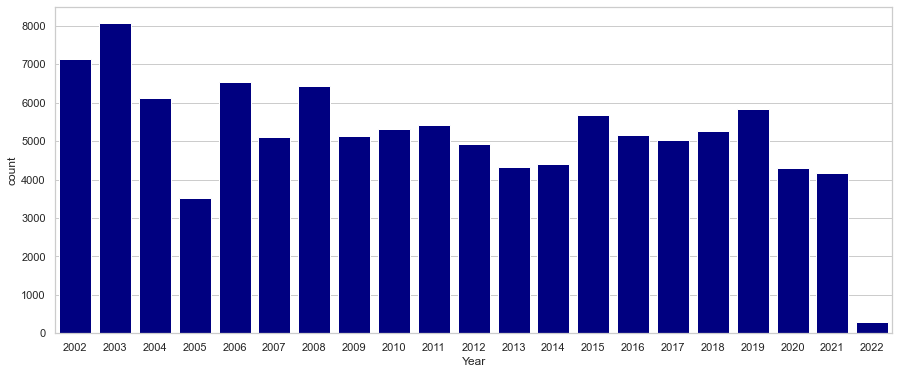

In [53]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['Year'],color="navy",saturation=1,ax=ax);

# A volume decrease in the start of the period and then a plateau , up to 2020/2021 due to COVID context 
# 2022 : data extraction ends at 2022/01
# Drop in 2005 : explanation ?

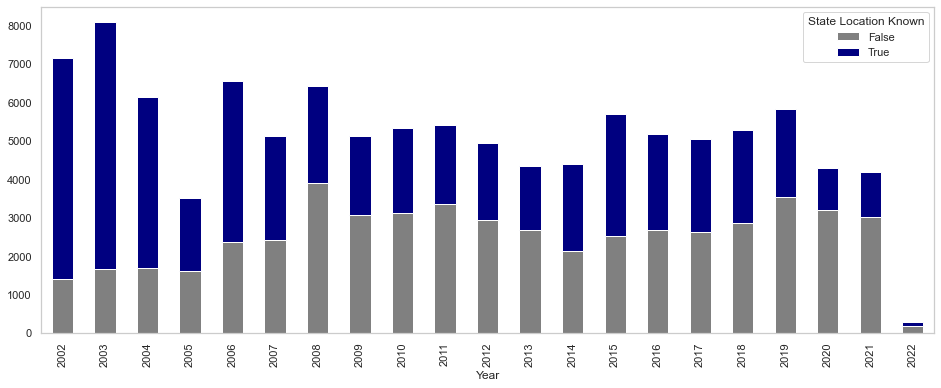

In [65]:
df_plot = df.groupby(['Year', 'State Location Known']).size().reset_index().pivot(columns='State Location Known', index='Year', values=0)
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(kind='bar', color = ['grey', 'navy'], stacked=True,ax=ax)
plt.grid(False);



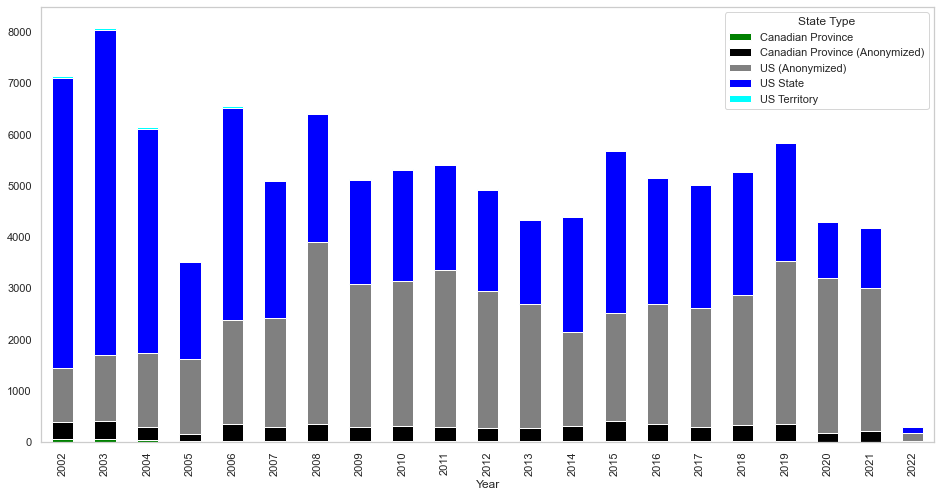

In [61]:
df_plot = df.groupby(['Year', 'State Type']).size().reset_index().pivot(columns='State Type', index='Year', values=0)
fig, ax = plt.subplots(figsize=(16,8))
df_plot.plot(kind='bar', color = ['green','black','grey' ,'blue','cyan'], stacked=True,ax=ax)
plt.grid(False);

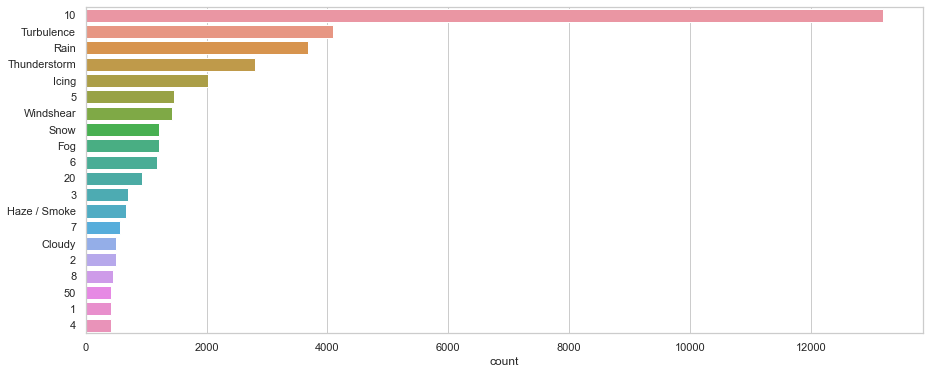

In [66]:
# Parsing de la colonne 'Weather Elements / Visibility' et top 20 des modalités
WeatherElements=df['Weather Elements / Visibility'].str.split('; ', expand=True).stack().reset_index(drop=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(y=WeatherElements, order=WeatherElements.value_counts().iloc[:20].index);
